In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#Header information for project candidate 1: Red Wine Quality
df0 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Files and Assignments/winequality-red.csv', sep=';')
pd.set_option('display.width',250)
pd.set_option('display.max_columns',15)
pd.set_option('display.min_rows', 50)
print(df0.shape)
print(df0.head(2))
print(df0.describe())
print(df0.info())

(1599, 12)
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  alcohol  quality
0            7.4              0.70          0.0             1.9      0.076                 11.0                  34.0   0.9978  3.51       0.56      9.4        5
1            7.8              0.88          0.0             2.6      0.098                 25.0                  67.0   0.9968  3.20       0.68      9.8        5
       fixed acidity  volatile acidity  citric acid  residual sugar    chlorides  free sulfur dioxide  total sulfur dioxide      density           pH    sulphates      alcohol      quality
count    1599.000000       1599.000000  1599.000000     1599.000000  1599.000000          1599.000000           1599.000000  1599.000000  1599.000000  1599.000000  1599.000000  1599.000000
mean        8.319637          0.527821     0.270976        2.538806     0.087467            15.874922             46.467792  

In [4]:
#Drop Duplicate Rows
df0.duplicated().any()
df0 = df0.drop_duplicates()
print(df0.shape)

(1359, 12)


In [5]:
#Address Missing Values
df0.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
#For Loop to find outliers and inconsistent categories
counter = len(df0.loc[1,:])  
for x in range(counter):
  if df0.iloc[:,x].dtypes == 'int64':
    print('\n\n', df0.iloc[:,x].head(0))
    print('Min =', df0.iloc[:,x].min())
    print('Max =', df0.iloc[:,x].max())
    print('Mean =', df0.iloc[:,x].mean())
  if df0.iloc[:,x].dtypes == 'float64':
    print('\n\n', df0.iloc[:,x].head(0))
    print('Min =', df0.iloc[:,x].min())
    print('Max =', df0.iloc[:,x].max())
    print('Mean =', df0.iloc[:,x].mean())
  elif df0.iloc[:,x].dtypes == 'object':
    print('\n\n', df0.iloc[:,x].head(0))
    print('Categories: ', df0.iloc[:,x].value_counts())



 Series([], Name: fixed acidity, dtype: float64)
Min = 4.6
Max = 15.9
Mean = 8.310596026490087


 Series([], Name: volatile acidity, dtype: float64)
Min = 0.12
Max = 1.58
Mean = 0.5294775570272258


 Series([], Name: citric acid, dtype: float64)
Min = 0.0
Max = 1.0
Mean = 0.27233259749815975


 Series([], Name: residual sugar, dtype: float64)
Min = 0.9
Max = 15.5
Mean = 2.523399558498897


 Series([], Name: chlorides, dtype: float64)
Min = 0.012
Max = 0.611
Mean = 0.0881236203090504


 Series([], Name: free sulfur dioxide, dtype: float64)
Min = 1.0
Max = 72.0
Mean = 15.893303899926417


 Series([], Name: total sulfur dioxide, dtype: float64)
Min = 6.0
Max = 289.0
Mean = 46.82597498160412


 Series([], Name: density, dtype: float64)
Min = 0.99007
Max = 1.00369
Mean = 0.9967089477557026


 Series([], Name: pH, dtype: float64)
Min = 2.74
Max = 4.01
Mean = 3.309786607799856


 Series([], Name: sulphates, dtype: float64)
Min = 0.33
Max = 2.0
Mean = 0.6587049300956593


 Series([], Name: a

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc3c75af810>,
      dtype=object)

<Figure size 720x720 with 0 Axes>

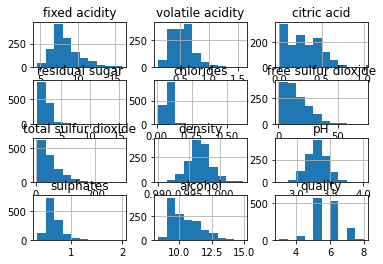

In [7]:
plt.figure(figsize=(10,10));                      #4GCR
df0.hist()

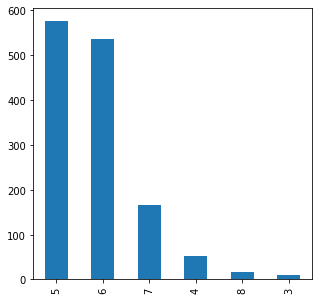

In [8]:
#Plot univariate distribution to find outliers
dftemp = df0.sort_values(by='quality')
plt.figure(figsize=(5,5))
dftemp['quality'].value_counts().plot(kind = 'bar');
plt.show()

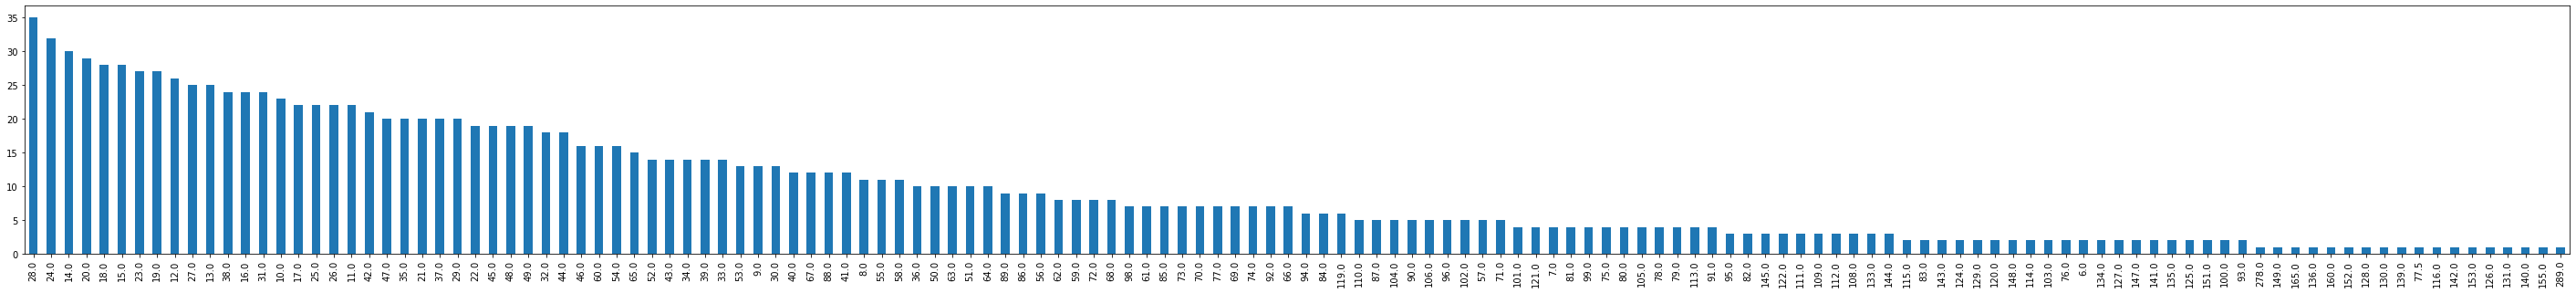

In [9]:
plt.figure(figsize=(50,5))
dftemp['total sulfur dioxide'].value_counts().plot(kind = 'bar');
plt.show()
#Distribution shows a range of values stepping to the maximum value

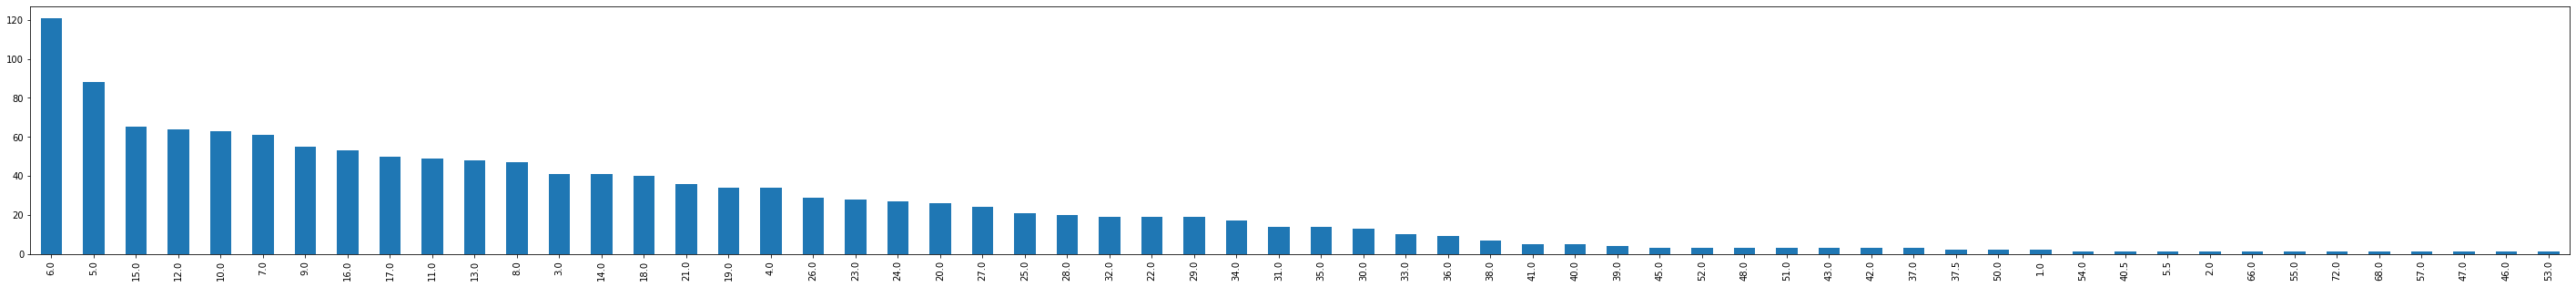

In [10]:
plt.figure(figsize=(50,5))
dftemp['free sulfur dioxide'].value_counts().plot(kind = 'bar');
plt.show()
#Distribution shows a range of values stepping to the maximum value

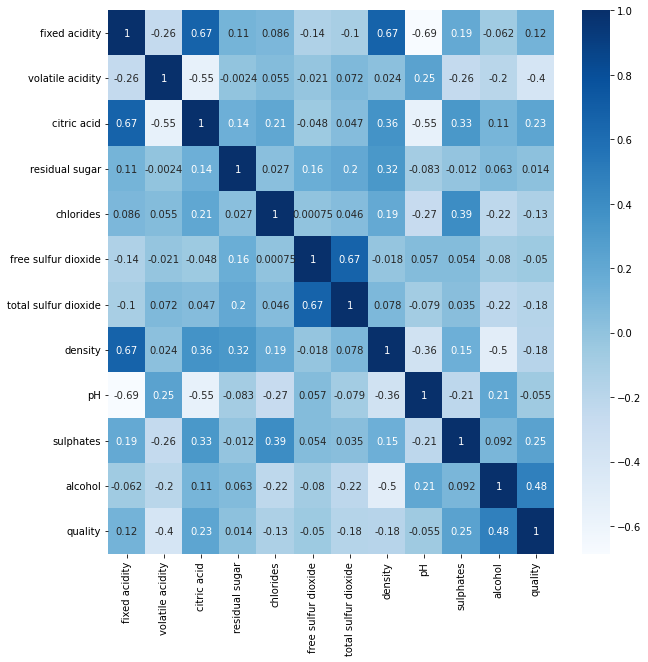

In [11]:
corr = df0.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap = 'Blues', annot=True)
#Only exhibits low correlation with alcohol and sulphates (alcohol scoring close to moderate correlation)